In [1]:
import traffic
import pandas as pd 
import os
from traffic.core import Traffic
from biblio_herramienta.herramienta import *
from biblio_herramienta.tratardatos import *

In [2]:
carpetaDatos = r'datos_sectores/' # carpeta que contiene los datos
nombreDatos = "datos_filtrados_def.csv" 

vuelos = cargardatos(carpetaDatos,nombreDatos)
vuelos

,,count
icao24,callsign,
4ca60f,IBK5BV,4034
4cace5,IBK6054,3266
344495,GES381L,3216
49514c,TAP434M,3065
4cace5,IBK6055,2689
345645,VLG3981,2478
48520d,TRA845,2193
4ca25a,RYR5VC,2183
3c56f7,EWG4TP,2171


In [3]:
vuelos = vuelos.assign_id().unwrap().eval(max_workers=4)
vuelos.data.head()

,Unnamed: 0,Unnamed: 0.1,alert,altitude,callsign,geoaltitude,groundspeed,hour,icao24,last_position,latitude,longitude,onground,spi,squawk,timestamp,track,vertical_rate,flight_id,track_unwrapped
0,417115,28342,False,35950.0,IBE31RT,36425.0,410.0,2019-02-05 15:00:00+00:00,342090,2019-02-05 15:35:47.402999808+00:00,42.336560,-2.736362,False,False,1454.0,2019-02-05 15:35:48+00:00,34.077195,768.0,IBE31RT_095,34.077195
1,417124,28343,False,35950.0,IBE31RT,36450.0,410.0,2019-02-05 15:00:00+00:00,342090,2019-02-05 15:35:48.877000192+00:00,42.337921,-2.735096,False,False,1454.0,2019-02-05 15:35:49+00:00,34.077195,576.0,IBE31RT_095,34.077195
2,417142,28344,False,35950.0,IBE31RT,36450.0,410.0,2019-02-05 15:00:00+00:00,342090,2019-02-05 15:35:49.212999936+00:00,42.339633,-2.733552,False,False,1454.0,2019-02-05 15:35:50+00:00,34.077195,576.0,IBE31RT_095,34.077195
3,417149,28345,False,35975.0,IBE31RT,36450.0,411.0,2019-02-05 15:00:00+00:00,342090,2019-02-05 15:35:50.564000+00:00,42.341263,-2.732100,False,False,1454.0,2019-02-05 15:35:51+00:00,33.999145,448.0,IBE31RT_095,33.999145
4,417161,28346,False,35975.0,IBE31RT,36450.0,411.0,2019-02-05 15:00:00+00:00,342090,2019-02-05 15:35:51.395000064+00:00,42.342891,-2.730614,False,False,1454.0,2019-02-05 15:35:52+00:00,33.999145,448.0,IBE31RT_095,33.999145


In [4]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from traffic.core.projection import CH1903

# la funcion permite aplicar algoritmos de ML a los datos que tenemos
vuelos_dbscan = vuelos.clustering(
    nb_samples=15, # divide en 15 puntos las trayecorias
    features=["longitude", "latitude", "track_unwrapped"], # datos cebados al algorimto de ML
    clustering=DBSCAN(eps=0.5, min_samples=10), # algoritmo de ML utilizado, con los parámetros del mismo
    transform=StandardScaler(), # lo que hace esto es escalar los datos dentro de una distribuciñ¡ón Gausiana
).fit_predict()


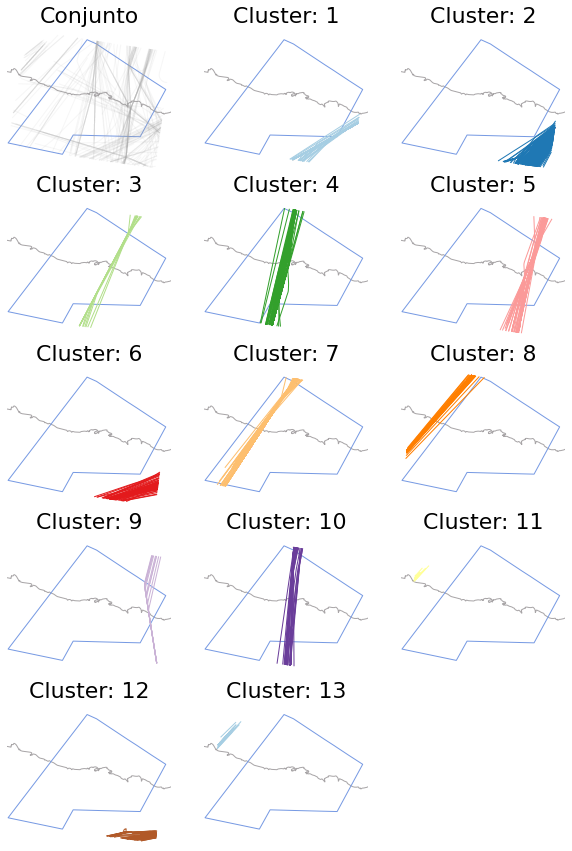

In [5]:
representarcluster(vuelos_dbscan,"cluster_dbscan.png","filtrado_cluster/")

In [30]:
vuelos_dbscan.data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720398 entries, 1623 to 1247094
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   Unnamed: 0       720398 non-null  int64              
 1   Unnamed: 0.1     720398 non-null  int64              
 2   alert            720398 non-null  bool               
 3   altitude         720398 non-null  float64            
 4   callsign         720398 non-null  object             
 5   geoaltitude      720398 non-null  float64            
 6   groundspeed      720398 non-null  float64            
 7   hour             720398 non-null  datetime64[ns, UTC]
 8   icao24           720398 non-null  object             
 9   last_position    720398 non-null  datetime64[ns, UTC]
 10  latitude         720398 non-null  float64            
 11  longitude        720398 non-null  float64            
 12  onground         720398 non-null  bool               


In [25]:
vuelos_dbscan_f = vuelos_dbscan.data.copy()

In [28]:
clusters = (1, 2, 6, 8, 11, 12 , 13)
vuelos_dbscan_F = pd.DataFrame()
for i in clusters:
    aviones_fuera_sector = vuelos_dbscan.data[vuelos_dbscan.data["cluster"]== int(i)].index
    vuelos_dbscan_f = vuelos_dbscan.data.drop(aviones_fuera_sector,inplace = True)

#vuelos_dbscan_f = vuelos_dbscan_f.drop(aviones_fuera_sector,inplace = True)
#aviones_entierra =  vuelos_prueba.data[vuelos_prueba.data["onground"] == True].index # elimina las aeronaves en tierra
#vuelos_prueba.data.drop(aviones_entierra,inplace = True)

In [29]:
vuelos_dbscan_f.data.head()

AttributeError: 'NoneType' object has no attribute 'data'